In [1]:
import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb
import numpy as np
import os
from mafContrib.LSSObsStrategy.galaxyCountsMetric_extended import GalaxyCountsMetric_extended
from lsst.sims.maf.metrics.snCadenceMetric import SNCadenceMetric
from lsst.sims.maf.metrics.snSNRMetric import SNSNRMetric
from lsst.sims.featureScheduler.surveys import generate_dd_surveys
from lsst.sims.maf.utils.snUtils import Lims, ReferenceData
from lsst.sims.utils import hpid2RaDec, angularSeparation

import lsst.sims.maf.db as db

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
name = 'templates_1exp_pairsmix_10yr'
resultsDb = db.ResultsDb(outDir=name)
opsdb = db.OpsimDatabaseV4('templates_1exp_pairsmix_10yrs.db')
#opsdb = db.OpsimDatabaseV4('../baselines/baseline_1exp_pairsmix_10yrs.db')

In [3]:
bundleList = []
displayDict = {'group': 'SRD', 'subgroup': 'Gaps', 'order': 0, 'caption': None}
plotDict = {'percentileClip': 95.}
nside=64
healslicer = slicers.HealpixSlicer(nside=nside)
subsetPlots = [plots.HealpixSkyMap(), plots.HealpixHistogram()]

for filtername in 'ugrizy':
    sql ='filter ="%s"' % filtername
    metric = metrics.MaxGapMetric()
    summaryMetrics = [metrics.PercentileMetric(percentile=98, metricName='98th percentile of Max gap, %s' % filtername)]
    bundle = mb.MetricBundle(metric, healslicer, sql, plotFuncs=subsetPlots,
                             summaryMetrics=summaryMetrics, displayDict=displayDict, plotDict=plotDict)
    bundleList.append(bundle)
    displayDict['order'] += 1

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint filter ="i" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 559572 visits
Running:  ['opsim_MaxGap_observationStartMJD_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="y" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 492919 visits
Running:  ['opsim_MaxGap_observationStartMJD_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="u" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 189769 visits
Running:  ['opsim_MaxGap_observationStartMJD_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="r" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 581427 visit

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 695 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="y"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1569 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1136 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1100 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="g"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 817 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="z"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 671 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


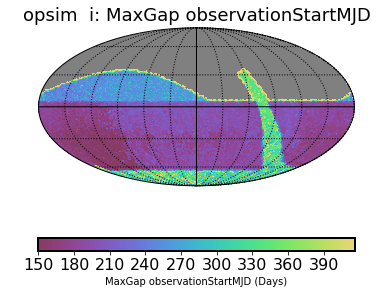

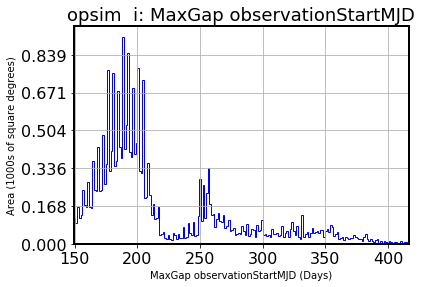

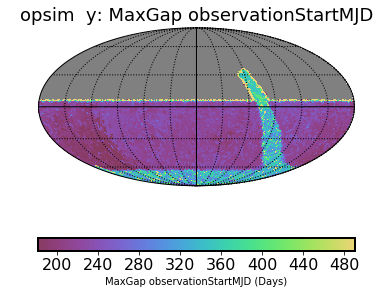

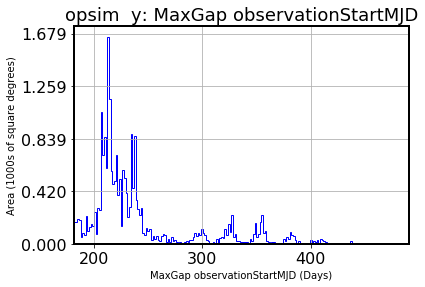

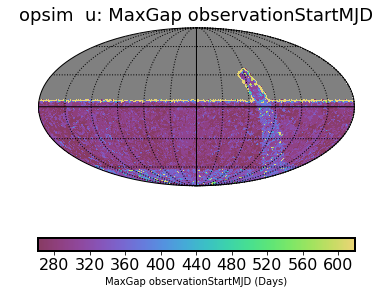

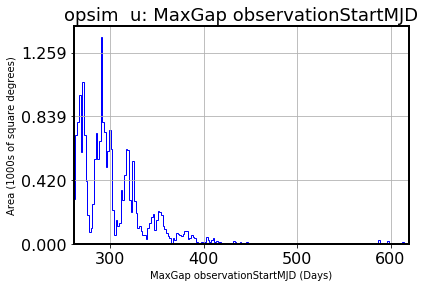

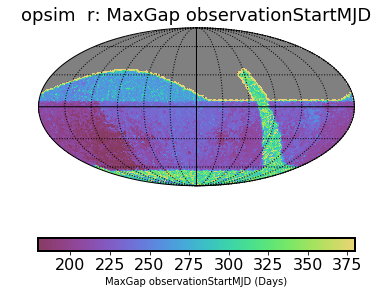

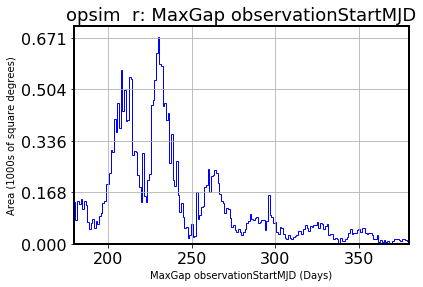

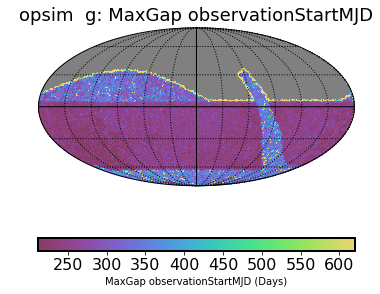

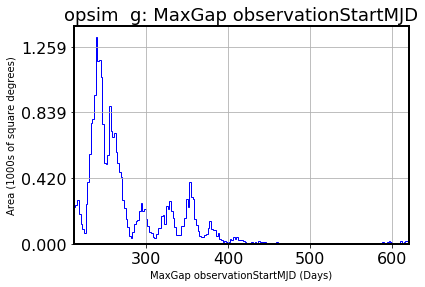

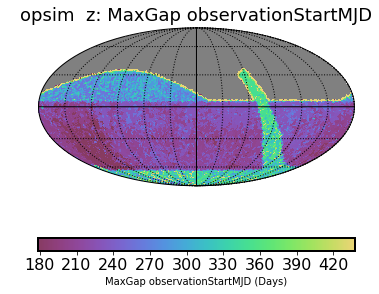

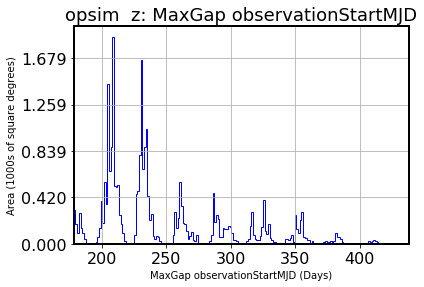

In [4]:
bd = mb.makeBundlesDictFromList(bundleList)
group = mb.MetricBundleGroup(bd, opsdb, outDir=name, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [5]:
for bundle in bundleList:
    print(bundle.summaryValues)

{'98th percentile of Max gap, u': 674.01659618182919}
{'98th percentile of Max gap, g': 649.16437347250496}
{'98th percentile of Max gap, r': 406.89747558856249}
{'98th percentile of Max gap, i': 474.94147940506809}
{'98th percentile of Max gap, z': 588.56345439719473}
{'98th percentile of Max gap, y': 599.32637077386869}


Querying database SummaryAllProps with constraint filter ="i" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 560824 visits
Running:  ['opsim_MaxGap_observationStartMJD_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="y" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 493845 visits
Running:  ['opsim_MaxGap_observationStartMJD_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="u" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 191470 visits
Running:  ['opsim_MaxGap_observationStartMJD_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="r" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 582703 visit

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 602 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="y"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1519 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 951 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 788 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="g"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 518 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="z"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 528 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


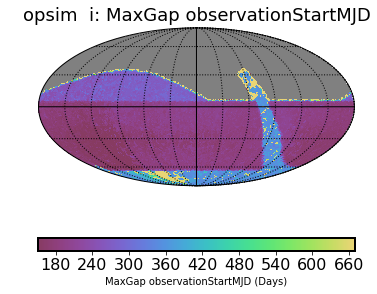

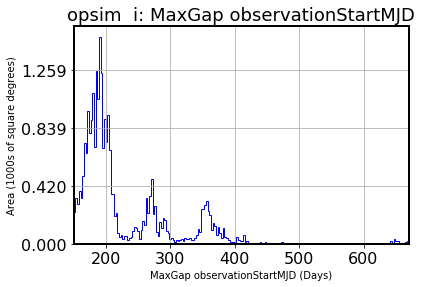

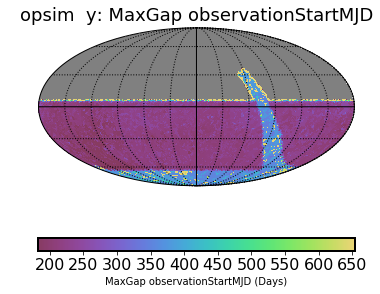

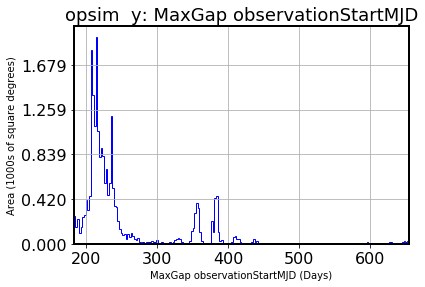

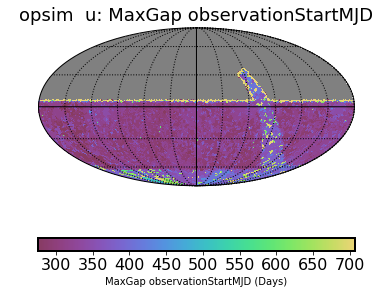

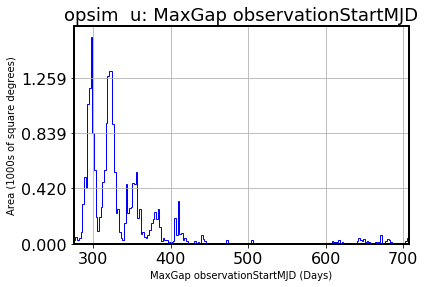

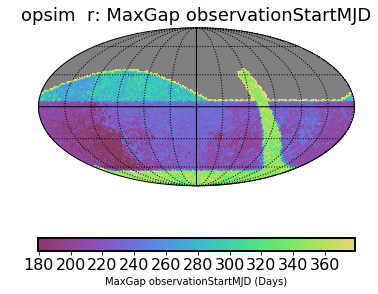

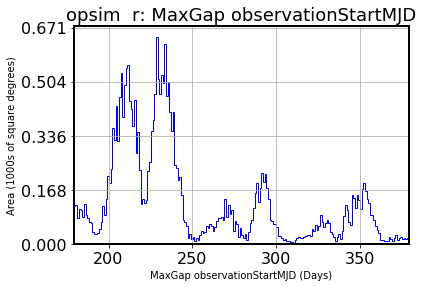

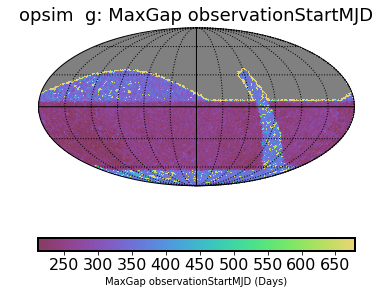

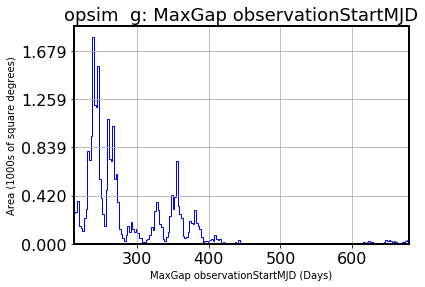

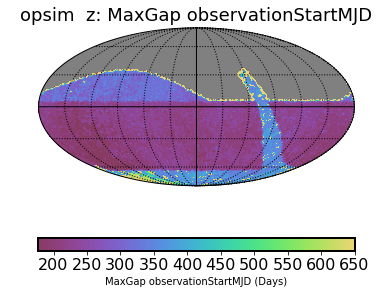

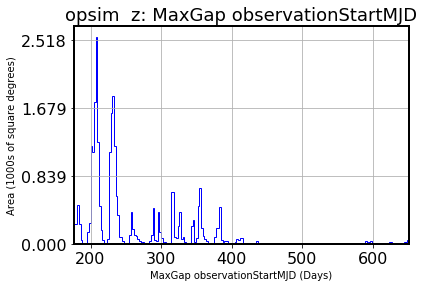

In [8]:
name = 'templates_1exp_pairsmix_10yr'
resultsDb = db.ResultsDb(outDir=name)
#opsdb = db.OpsimDatabaseV4('templates_1exp_pairsmix_10yrs.db')
opsdb = db.OpsimDatabaseV4('../baselines/baseline_1exp_pairsmix_10yrs.db')
bd = mb.makeBundlesDictFromList(bundleList)
group = mb.MetricBundleGroup(bd, opsdb, outDir=name, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

In [9]:
for bundle in bundleList:
    print(bundle.summaryValues)

{'98th percentile of Max gap, u': 715.99608094934649}
{'98th percentile of Max gap, g': 701.03431013147201}
{'98th percentile of Max gap, r': 386.99785031680221}
{'98th percentile of Max gap, i': 678.9976107614209}
{'98th percentile of Max gap, z': 676.03496401937082}
{'98th percentile of Max gap, y': 682.50310183958629}
